# This notebook will serve for the analysis of the Room Features for the TFW project

In [6]:
# Import necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:

# read in dataset

df_room_features = pd.read_csv('/Users/petermcisaac/neue-fische-traum/traum-preis/datasets/rooms_features_20210707.csv', low_memory=False)


In [9]:
room_features.head(30)


,listing_id,description,area,description.1
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,balcony,NaN,garden furniture
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,bathroom,NaN,mirror
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,bathroom,NaN,shower
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,bathroom,NaN,toilet
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,bathroom,NaN,wash basin
5,fbd74bce-23dd-53e7-b988-8beb85160d6f,bedroom,NaN,double bed
6,fbd74bce-23dd-53e7-b988-8beb85160d6f,bedroom,NaN,single bed
7,fbd74bce-23dd-53e7-b988-8beb85160d6f,bedroom,NaN,wardrobe
8,fbd74bce-23dd-53e7-b988-8beb85160d6f,category,NaN,NaN
9,fbd74bce-23dd-53e7-b988-8beb85160d6f,general,NaN,central heating


In [11]:
df_room_features.area.unique()

array([nan, '0', '23', '6', '13', '4', '10', '17', '2000', '2', '22',
       '124', '9', '16', '15', '42', '12', '14', '20', '7', '55', '25',
       '30', '8', '1000', '50', '5', '100', '200', '500', '180', '3',
       '32', '1', '175', '18', '400', '19', '10000', '60', '70', '450',
       '28', '40', '45', '2500', '85', '5000', '300', '35', '21', '600',
       '1035', '24', '80', '870', '11', '3000', '240', '75', '40 - 50',
       '48', '41-69', '120', '44', '1300', '1400', '1650', '27', '36',
       '7400', '350', '78', '4500', '15000', '53', '90', '30000', '700',
       '330', '64', '900', '800', '26', '29', '1500', '20000', '39', '68',
       '140', '150', '2200', '950', '185', '46', '1600', '38', '250',
       '6600', '54', '33', '4000', '96', '160', '33000', '6000', '2300',
       '47', '1100', '93', '380-450', '34', '750', '3200', '1800', '810',
       '12- 16', '31', '1200', '95', '1900', '220', '65', '52', '50000',
       '49', '25000', '8000', '110', '260', '134', '1262', '19

/Users/petermcisaac/neue-fische-traum/traum-preis/.venv/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/petermcisaac/neue-fische-traum/traum-preis/.venv/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


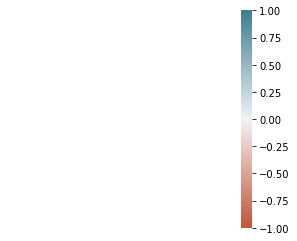

In [10]:
## correlation matrix with correlations as numbers
n = room_features.shape[1]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(room_features.corr(), dtype=bool))

corr = df_room_features.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);